# Explore here

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV



In [2]:
url = "https://breathecode.herokuapp.com/asset/internal-link?id=733&path=demographic_health_data.csv"
df = pd.read_csv(url)

df.head()


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [3]:
df.info()
df.describe().T
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

In [9]:
target = "diabetes_prevalence"


In [23]:
df = df.drop(columns=["COUNTY_NAME"])


In [24]:
df_encoded = pd.get_dummies(df, columns=["STATE_NAME"], drop_first=True)

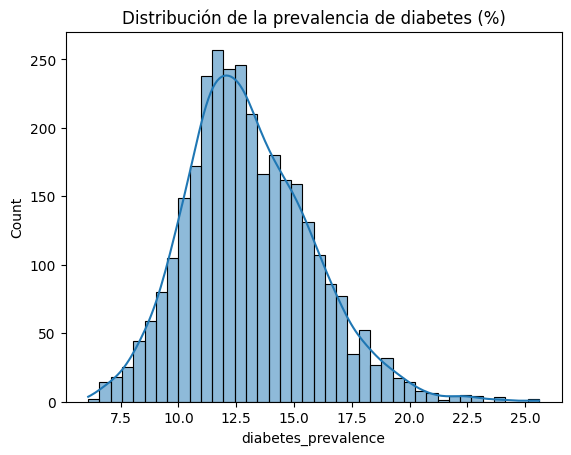

In [25]:
sns.histplot(df[target], kde=True)
plt.title("Distribución de la prevalencia de diabetes (%)")
plt.show()


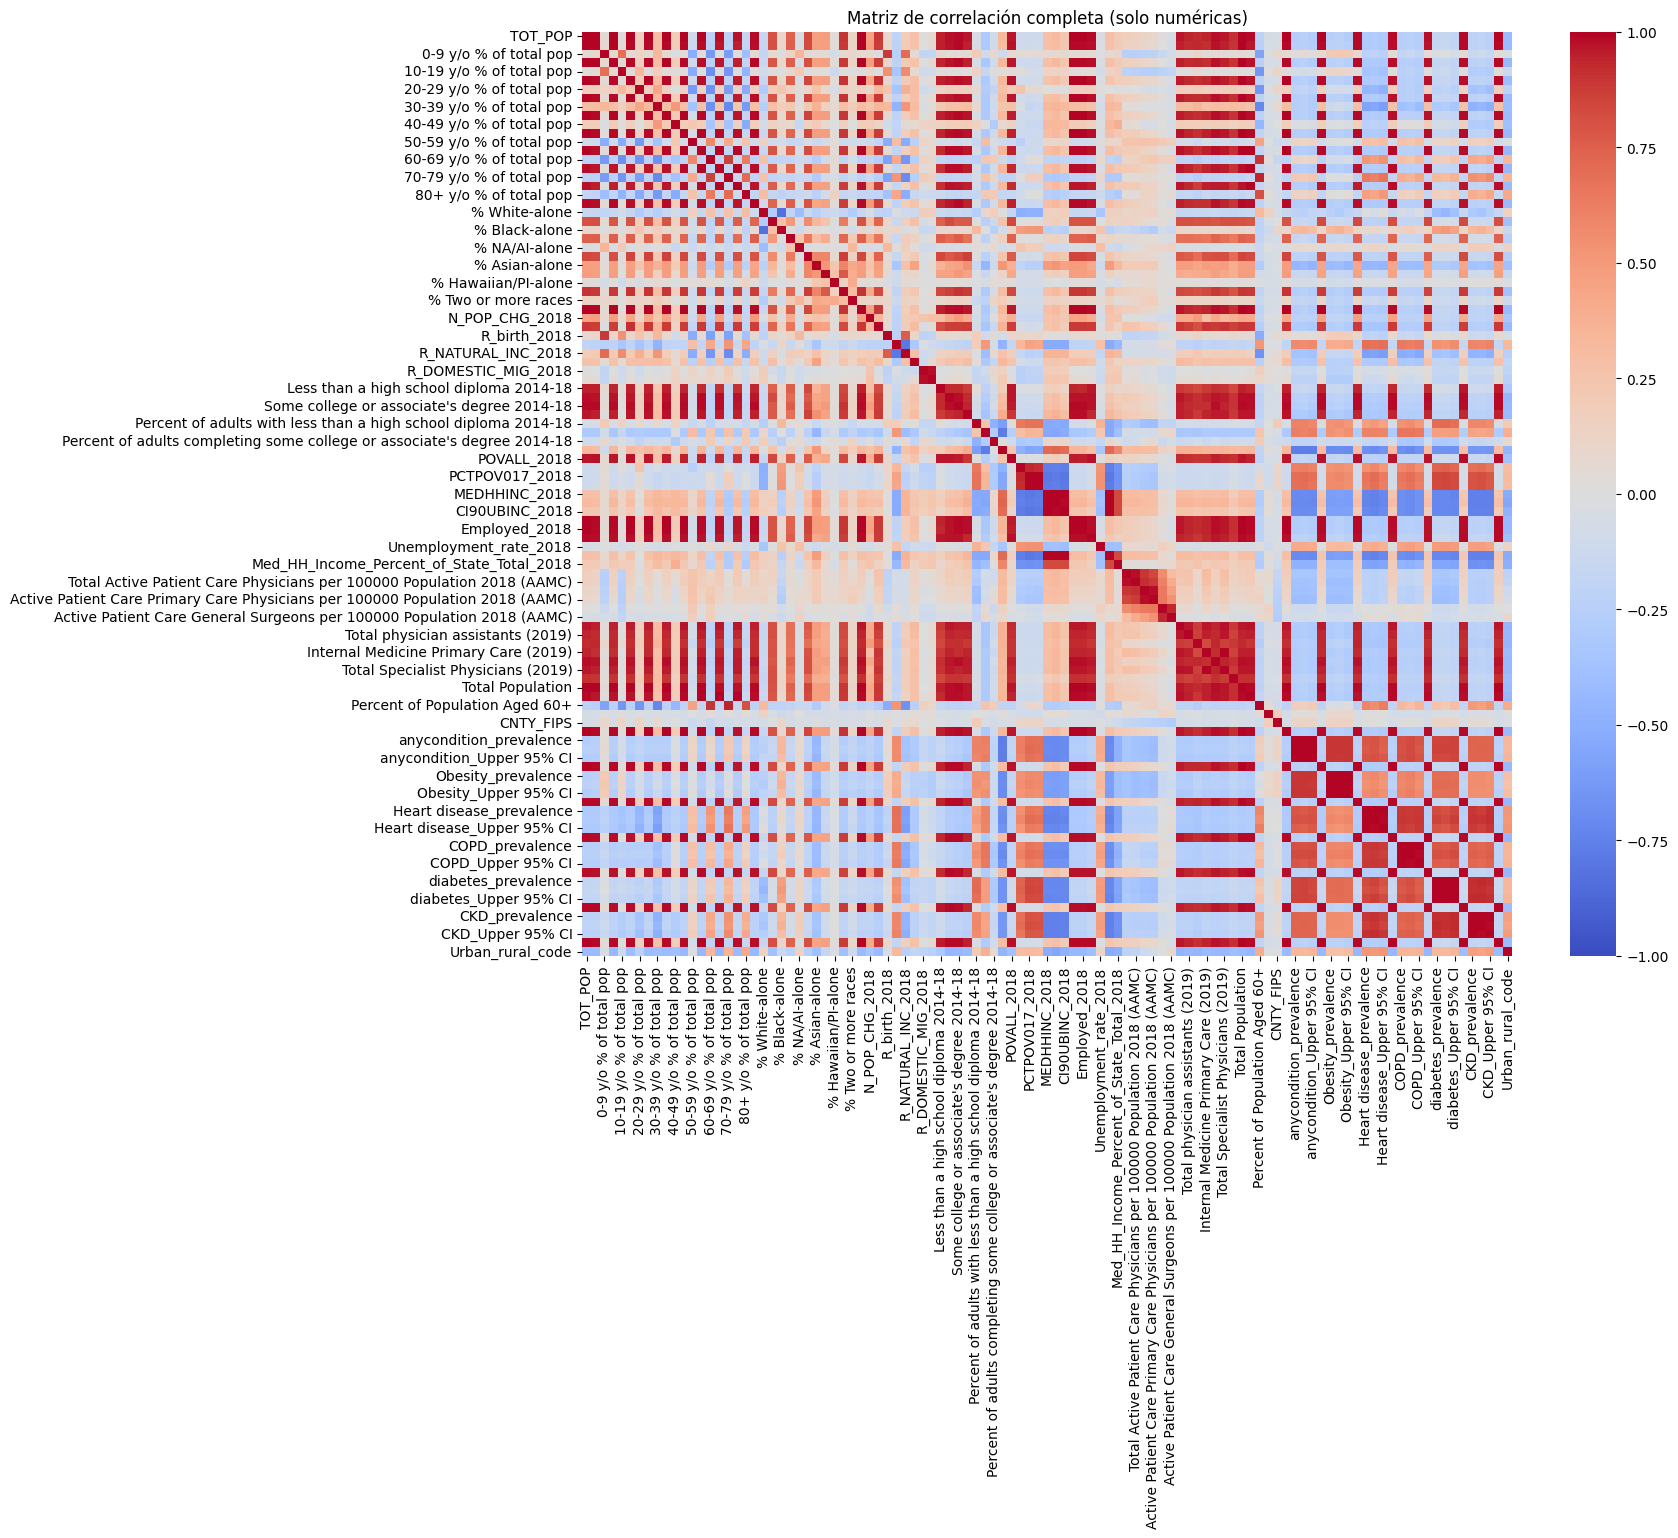

In [27]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15,12))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlación completa (solo numéricas)")
plt.show()



Entrenamiento de modelo

In [28]:
X = df_encoded.drop(columns=[target])
y = df_encoded[target]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [30]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("📉 MSE Regresión Lineal:", mse_lin)
print("📈 R² Regresión Lineal:", r2_lin)


📉 MSE Regresión Lineal: 0.0019572211107393256
📈 R² Regresión Lineal: 0.9997566599360459


In [31]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
lasso = Lasso(alpha=1.0, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("📉 MSE Lasso:", mse_lasso)
print("📈 R² Lasso:", r2_lasso)


📉 MSE Lasso: 1.123561799716229
📈 R² Lasso: 0.8603082714062575


In [33]:
alphas = np.linspace(0, 20, 50)
r2_scores = []

for a in alphas:
    lasso_temp = Lasso(alpha=a, max_iter=10000)
    lasso_temp.fit(X_train_scaled, y_train)
    y_pred_temp = lasso_temp.predict(X_test_scaled)
    r2_scores.append(r2_score(y_test, y_pred_temp))


/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.067e+00, tolerance: 1.823e+00
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_co

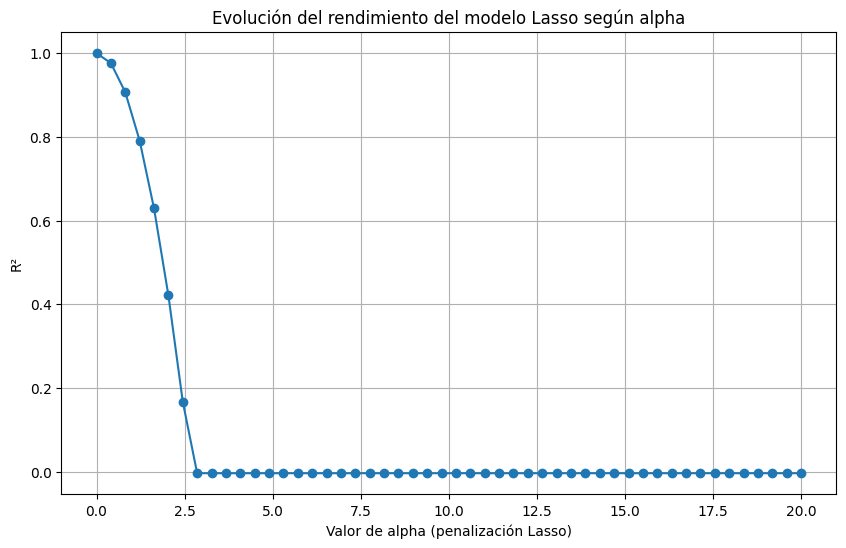

In [34]:
plt.figure(figsize=(10,6))
plt.plot(alphas, r2_scores, marker='o')
plt.xlabel("Valor de alpha (penalización Lasso)")
plt.ylabel("R²")
plt.title("Evolución del rendimiento del modelo Lasso según alpha")
plt.grid(True)
plt.show()


In [38]:
lasso_cv = LassoCV(cv=5, alphas=np.linspace(0.001, 10, 100), max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

print("🔍 Mejor alpha encontrado:", lasso_cv.alpha_)
print("📈 R² con mejor alpha:", lasso_cv.score(X_test_scaled, y_test))

🔍 Mejor alpha encontrado: 0.001
📈 R² con mejor alpha: 0.9997396790765891


In [39]:
coef_df = pd.DataFrame({
    "variable": X.columns,
    "coef_lasso": lasso_cv.coef_
})

coef_df = coef_df.sort_values(by="coef_lasso", ascending=False)
coef_df.head(15)


,variable,coef_lasso
97,diabetes_Upper 95% CI,1.404713
96,diabetes_Lower 95% CI,1.288441
45,Percent of adults with a high school diploma o...,0.002585
99,CKD_prevalence,0.001170
86,Obesity_Upper 95% CI,0.001132
37,R_INTERNATIONAL_MIG_2018,0.000559
124,STATE_NAME_Massachusetts,0.000443
120,STATE_NAME_Kentucky,0.000395
131,STATE_NAME_Nevada,0.000300
58,Unemployment_rate_2018,0.000297


In [41]:
print(f"""
📌 CONCLUSIONES DEL MODELO – Prevalencia de Diabetes (USA)

1. Eliminamos COUNTY_NAME para evitar miles de columnas categóricas inútilespoco utiles,
   obteniendo un dataset más limpio y eficiente.

2. La regresión lineal obtuvo un R² de {r2_lin:.3f}, lo cual indica un ajuste moderado
   a bueno dependiendo de la complejidad del condado.

3. El modelo Lasso (alpha=1.0) obtuvo un R² de {r2_lasso:.3f},
   permitiendo reducir ruido y seleccionar variables importantes.

4. La curva R² vs α mostró cómo la penalización afecta la simplicidad y desempeño
   del modelo. Existe un punto óptimo de generalización.

5. LassoCV identificó automáticamente el mejor alpha = {lasso_cv.alpha_:.4f},
   proporcionando un equilibrio entre complejidad y rendimiento.

6. Este análisis permite identificar qué factores socio-demográficos
   se relacionan con la prevalencia de diabetes en EE.UU.
""")



📌 CONCLUSIONES DEL MODELO – Prevalencia de Diabetes (USA)

1. Eliminamos COUNTY_NAME para evitar miles de columnas categóricas inútilespoco utiles,
   obteniendo un dataset más limpio y eficiente.

2. La regresión lineal obtuvo un R² de 1.000, lo cual indica un ajuste moderado
   a bueno dependiendo de la complejidad del condado.

3. El modelo Lasso (alpha=1.0) obtuvo un R² de 0.860,
   permitiendo reducir ruido y seleccionar variables importantes.

4. La curva R² vs α mostró cómo la penalización afecta la simplicidad y desempeño
   del modelo. Existe un punto óptimo de generalización.

5. LassoCV identificó automáticamente el mejor alpha = 0.0010,
   proporcionando un equilibrio entre complejidad y rendimiento.

6. Este análisis permite identificar qué factores socio-demográficos
   se relacionan con la prevalencia de diabetes en EE.UU.

